## Histogram Equalisation

In this notebook the intensity histogram for a grayscale image will be produced and transformed in order to equalise the contrast of the image; hopefully giving the darker features in the image more promenance over the lighter features.

Histogram equalisation is a way to distribute the pixel intensities within an image in a more uniform manner. The image's cumulative frequency plot can be used as to transform the intensities in the image in order to achieve this; the details of which will be described further on in the notebook.


#### The Intensity Histogram
The intensity histogram is calculated using the OpenCV function calcHist which takes parameters:
* Images - the image that the histogram is being calculated of, passed in a list form.
* Channels - a list of the dimension channels used to compute the histogram, here it will be [0] to represent grayscale.
* Mask - There is no mask applied here.
* histSize - an array of the histogram size in each dimension, 256 to represent the range of intensity for an image.
* ranges - the lower and upper bins of the histogram, since it is uniform.

The outcome of this function will be a histogram that shows the presence of different pixel intensities (ranging from 0 to 256, representing a fully black or white pixel respectively) and their frequencies within an image. The results of this process can be seen below on a test image of the back of the eye, where the x-axis is the intensity and the y-axis is the frequency.

In [156]:
# imports
%matplotlib inline
from utilities import *
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

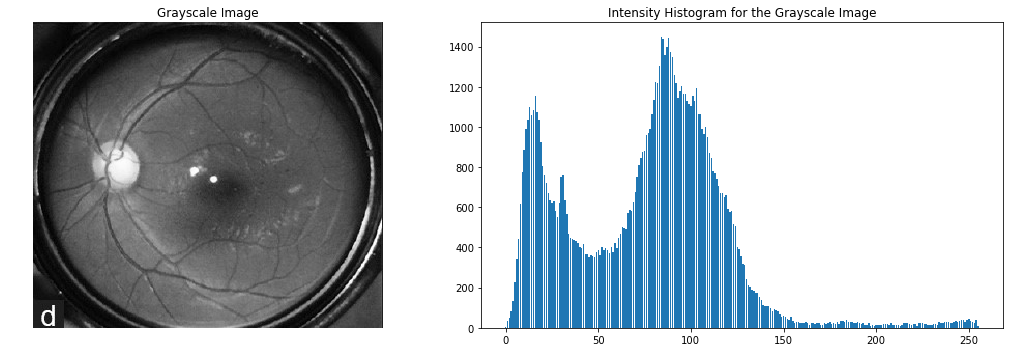

In [157]:
# load the image
img = read_image("eye.jpeg")
a_img = read_image("eye.jpeg")

# convert to grayscale
gray_img = convert_spaces(img, "RGB2GRAY")
alt_img = convert_spaces(a_img, "RGB2GRAY")

# generate the intensity histogram for the image
hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])

# plot the grayscale image and the histogram
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Grayscale Image")
ax1.imshow(gray_img, cmap="gray")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Intensity Histogram for the Grayscale Image")
ax2.bar(range(0, 256), hist)
fig.tight_layout()
plt.show()

#### Cumulative Frequency
The cumulative frequency array of an image is calculated using the numpy function cumsum, which has parameters:

 * a - an input array, here is it the histogram values that have been divided by the number of pixels in the image being used.
 * axis - the axis here is not specified so the cumsum is calculated over the flattened array.
 
By dividing each element in this array by the number of pixels in the image the cumulative probabiliy graph  can be plotted that has the pixel intensity range as the x-axis values and 0 to 1 as the y-axis values.

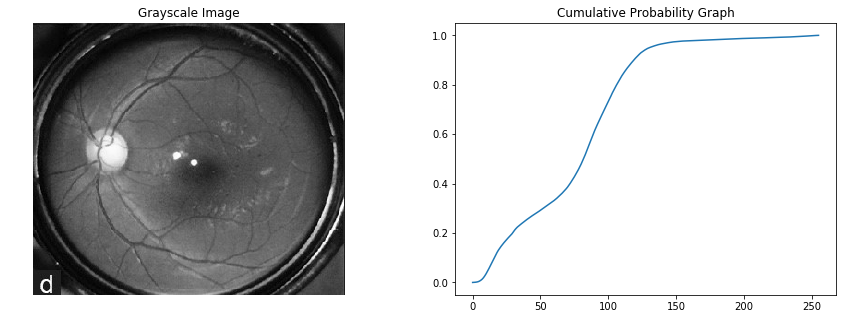

In [158]:
# calculate the cumulative probability of the grayscale image
cf = np.cumsum(hist/(gray_img.shape[0] * gray_img.shape[1]))

# plot picture and the cumulative probability graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Grayscale Image")
ax1.imshow(gray_img, cmap="gray")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Cumulative Probability Graph")
ax2.plot(cf)

#### Equalisation

To have equal contrast in an image, the cumulative probability plot should look like a straight diagonal line through the origin. To achieve this the cumulative probability at each pixel value in the image is multiplied by the maximum intensity value of the new image (here it will be 256 as we are working with grayscale still) and this then becomes the new intensity value for the pixel:

$$ cp_i * 256 = pi_i $$

Where $ cp_i $ is the cumulative probability at pixel $ i $ and $ pi_i $ is the new, transformed intensity at pixel $ i $.

This calculation can be seen in the code below, with the cumulative probability graph being recalculated to show the equalised plot. On the plot, it can be seen that the line produced is not perfectly straight and has jagged sections; but a perfectly straight line would indicate that all the intensities have been distributed evenly.

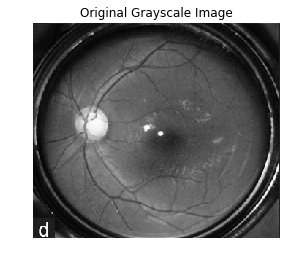

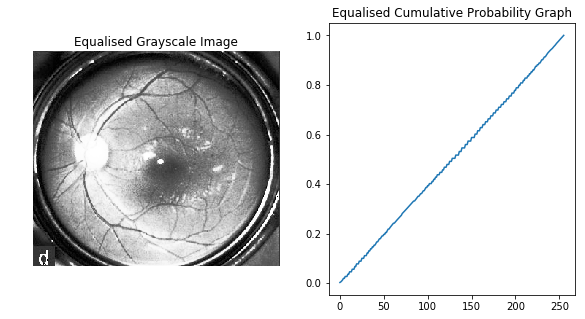

In [159]:
# for each pixel the intensity becomes the cumulative probability of 
# that intensity multiplied by the maximum intensity
for row in range(gray_img.shape[0]):
    for col in range(gray_img.shape[1]):
            alt_img[row, col] = cf[gray_img[row, col]] * 256
        
# generate the intensity histogram for the altered image
new_hist = cv2.calcHist([alt_img],[0],None,[256],[0,256])

# calculate the cumulative probability of the altered grayscale image
n_cf = np.cumsum(new_hist/(alt_img.shape[0] * alt_img.shape[1]))
    
# plot picture and the cumulative probability graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_axis_off()
ax1.set_title("Original Grayscale Image")
ax1.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(15,5))
ax2 = plt.subplot(1, 3, 2)
ax2.set_axis_off()
ax2.set_title("Equalised Grayscale Image")
ax2.imshow(alt_img, cmap='gray')

ax3 = plt.subplot(1, 3, 3)
ax3.set_title("Equalised Cumulative Probability Graph")
ax3.plot(n_cf)

#### Comments

It can be seen that the equalised cumulative probability graph is a near perfect straight line throuhg the origin, indicating that the process has worked. But looking at the before and after images, this transformation process does not seem to give the best results; some vessels in the eye have become more prominant and easier to view but the bright optic nerve appears to have lost the detail within and directly around it, which is important in the detection process. 

To rectify this issue, different ranges of pixel intensity could be altered by different amounts. For example, the darker intensities between 200 and 256 could be shifted to a range of 230 to 256 to make them darker and more pronouced. Essesntially following the same process and equalisation but instead of transforming every cumulative intensity probability by the same amount (the maximum intensity), they would be transformed by different amounts depending on their value to mimic a desired graphically shape as opposed to a straight diagonal line.